In [ ]:
# Atėjo metas sujungti visas žinias į vieną vietą, tam pasitelksime didesnės apimties užduotį:

# Parsisiųskite šį dataset: https://archive.ics.uci.edu/dataset/109/wine (galite rinktis ir bet kurį kitą, jus dominantį dataset)

# atlikite žemiau nurodytus žingsnius:

# Žingsniai:

# 1. Duomenų užkrovimas ir paruošimas
# 2. Klasterizavimas
#     2.1. Hierarchinis klasterizavimas
#     2.2. K-vidurkių klasterizavimas
#     2.3. DBSCAN klasterizavimas
# 3. Klasifikavimas
#     3.1. Decision Trees
#     3.2. Random Forests
#     3.3. Naive Bayes
#     3.4. Regresija
#     3.5. Linijinė regresija
#     3.6. Polinominė regresija
# 4. Modelio vertinimas
#     4.1. Tikslumas, jautrumas, specifiškumas
#     4.2. ROC ir AUC analizė
# 5. Hiperparametrų optimizavimas
#     5.1. Grid Search
# 6. Modelių interpretavimas

# Atlikus visus šiuos punktus aprašykite išvadą: kokie žingsniai buvo atlikti paruošiant duomenis, 
# kuris klasterizavimo metodas buvo labiausiai tinkamas ir dėl kokių priežasčių, kuris klasifikavimo metodas 
# buvo tinkamiausias, ką sužinote iš modelio vertinimo, kokie hiperparametrai yra geriausi? Taip pat pritaikykite modelio 
# interpretavimą keliems įrašams (pavieniui) argumentuotai atsakykite kodėl vienas įrašas yra klasifikuojamas yra būtent prie tam 
# tikros klasės.

In [24]:
import pdfplumber
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp, Trials
from hyperopt.pyll.base import scope
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import lime
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [25]:
data = pd.read_csv('wine.csv')

# Nurodyti stulpelių pavadinimus
column_names = ['class_identifier',
    "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]

data.columns = column_names

print(data)


     class_identifier  Alcohol  Malic acid   Ash  Alcalinity of ash  \
0                   1    13.20        1.78  2.14               11.2   
1                   1    13.16        2.36  2.67               18.6   
2                   1    14.37        1.95  2.50               16.8   
3                   1    13.24        2.59  2.87               21.0   
4                   1    14.20        1.76  2.45               15.2   
..                ...      ...         ...   ...                ...   
172                 3    13.71        5.65  2.45               20.5   
173                 3    13.40        3.91  2.48               23.0   
174                 3    13.27        4.28  2.26               20.0   
175                 3    13.17        2.59  2.37               20.0   
176                 3    14.13        4.10  2.74               24.5   

     Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
0          100           2.65        2.76                  0.26   
1          10

In [26]:
# Padalinti duomenis į įvesties ir tikslų kintamuosius
X = data.drop('class_identifier', axis=1)

y = data['class_identifier']

# Padalinti duomenis į treniruojamus ir testuojamus rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializuoti ir apmokyti sprendimų medį
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Inicializuoti ir apmokyti atsitiktinių miškų klasifikatorių
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Inicializuoti ir apmokyti Naive Bayes klasifikatorių
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)
nb_y_pred = nb_model.predict(X_test)
# Įvertinti modelių tikslumą
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

print("Decision Tree accuracy:", dt_accuracy)
print("Random Forest accuracy:", rf_accuracy)
print("Naive Bayes accuracy:", nb_accuracy)



Decision Tree accuracy: 0.8888888888888888
Random Forest accuracy: 0.9444444444444444
Naive Bayes accuracy: 0.9166666666666666


In [27]:
cm_dt = confusion_matrix(dt_y_pred, y_test)
kl11, kl12, kl13, kl21, kl22, kl23, kl31, kl32, kl33 = cm_dt.ravel()
print(kl11, kl22, kl33)

# kazkas kaizkaip, tolimesnei analizei
sensitivity = kl21 / (kl21 + kl13)
print(sensitivity)
specificity = kl11 / (kl11 + kl12)
print(specificity)

# sensitivity = tp / (tp + fn)
# specificity = tn / (tn + fp)

13 11 8
1.0
1.0


In [5]:
print(cm_dt)

[[13  0  1]
 [ 1 12  1]
 [ 0  2  6]]


In [6]:
cm_rf = confusion_matrix(rf_y_pred, y_test)

In [7]:
cm_nb = confusion_matrix(nb_y_pred, y_test)

In [8]:
dt_prob = dt_model.predict_proba(X_test)
print(dt_prob)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [9]:
dt_y_prob = dt_model.predict_proba(X_test)[:,1]
# fpr, tpr, _ = roc_curve(y_test, dt_y_prob)
# print(fpr, tpr)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr)
# plt.plot([0,1], [0,1])
# plt.show()


print(dt_y_prob)

[0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.]


In [10]:
param_grid = {
    'n_estimators': [10, 50, 100, 200], # medziu kiekis
    'max_depth': [None, 10, 20], # sprendimu kiekis medyje
    'min_samples_split': [2, 5, 10] # minimalus pavyzdžių kiekis
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X,y)


print(f'Geriausi parametrai: {grid_search.best_params_}')
print(f'Geriausias tikslumas: {grid_search.best_score_}')

dt_model2 = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2)

Geriausi parametrai: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Geriausias tikslumas: 0.9888888888888889


In [11]:
print(column_names)

['class_identifier', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


In [17]:
import lime
import lime.lime_tabular
import numpy as np

dt_model2 = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2)
dt_model2.fit(X,y)

X = np.array(X)

explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=column_names, class_names=['1','2','3'])
explain_first = explainer.explain_instance(X[1], dt_model2.predict_proba, num_features=20)
explain_first.show_in_notebook(show_all=False)

IndexError: list index out of range

In [18]:
from random import randint
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [randint(10, 200)], # medziu kiekis
    'max_depth': [None, 10, 20], # sprendimu kiekis medyje
    'min_samples_split': [randint(2, 20)] # minimalus pavyzdžių kiekis
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=200, cv=5, scoring='accuracy', random_state=42 )
random_search.fit(X,y)

print(f'Geriausi parametrai: {random_search.best_params_}')
print(f'Geriausias tikslumas: {random_search.best_score_}')


c:\Users\ostap\OneDrive\Рабочий стол\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=200. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Geriausi parametrai: {'n_estimators': 113, 'min_samples_split': 12, 'max_depth': None}
Geriausias tikslumas: 0.9776190476190475


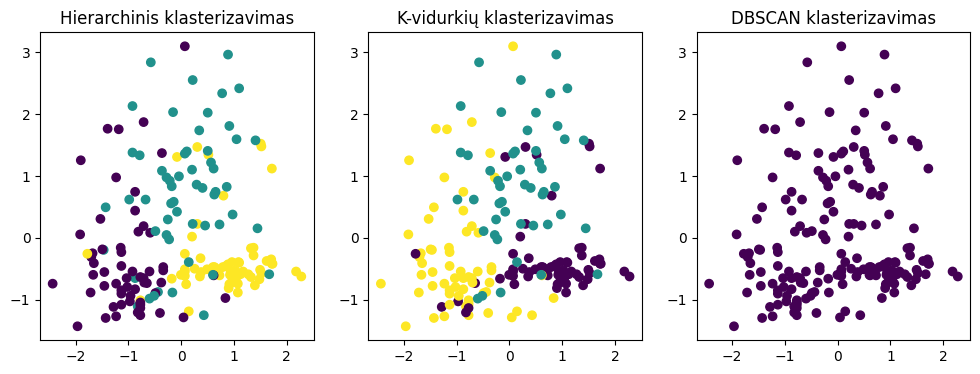

In [19]:
# Normalizuoti duomenis klasterizavimui
scaler = StandardScaler()
data_normalized = scaler.fit_transform(X)

# Klasterizavimas
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = hierarchical_clustering.fit_predict(data_normalized)

kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(data_normalized)

dbscan = DBSCAN(eps=5, min_samples=10)
dbscan_clusters = dbscan.fit_predict(data_normalized)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=hierarchical_clusters, cmap='viridis')
plt.title('Hierarchinis klasterizavimas')

plt.subplot(1, 3, 2)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-vidurkių klasterizavimas')

plt.subplot(1, 3, 3)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN klasterizavimas')

plt.show()

In [20]:

hierarchical_clusters_pakeistas = []
for sk in hierarchical_clusters:
    if sk == 0:
        hierarchical_clusters_pakeistas.append(2)
    elif sk == 1:
        hierarchical_clusters_pakeistas.append(3)
    else:
        hierarchical_clusters_pakeistas.append(1)

        
kmeans_clusters_pakeistas = []
for sk in kmeans_clusters:
    if sk == 0:
        kmeans_clusters_pakeistas.append(1)
    elif sk == 2:
        kmeans_clusters_pakeistas.append(2)
    elif sk == 1:
        kmeans_clusters_pakeistas.append(3)
        

In [21]:
print(hierarchical_clusters_pakeistas)
print(kmeans_clusters_pakeistas)
print(kmeans_clusters)
print(y)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [22]:
accuracy = accuracy_score(hierarchical_clusters_pakeistas, y)
print(accuracy)

0.9265536723163842


In [23]:
accuracy = accuracy_score(kmeans_clusters_pakeistas, y)
print(accuracy)

0.9491525423728814
